In [1]:
import matplotlib.pyplot as plt
from pathlib import Path

import sys
sys.path.append("ComputeCanada/frequency_tagging")
from dfm import (
    f1_f2_data, 
    plot_power_spectrum,
    set_base_dir,
    analyze_rois,
)

Plot ROI-level timeseries and also showing the effects of rephasing

In [2]:
datadir = Path("/scratch/fastfmri")
n_permutations = 1_000
n_bootstraps = 200
experiment_id = "1_frequency_tagging"
mri_id = "3T"
sub_id = "000"
roi_task_id = "entrain"
f1, f2 = .125, .2
task_id = "entrain"
fo = .8
pval = "fdrp"
bootstrap_id = 2
pkl_handler = f1_f2_data(datadir, n_bootstraps, sub_id, roi_task_id, f1, f2, task_id, experiment_id=experiment_id, mri_id=mri_id, fo=fo, pval=pval)

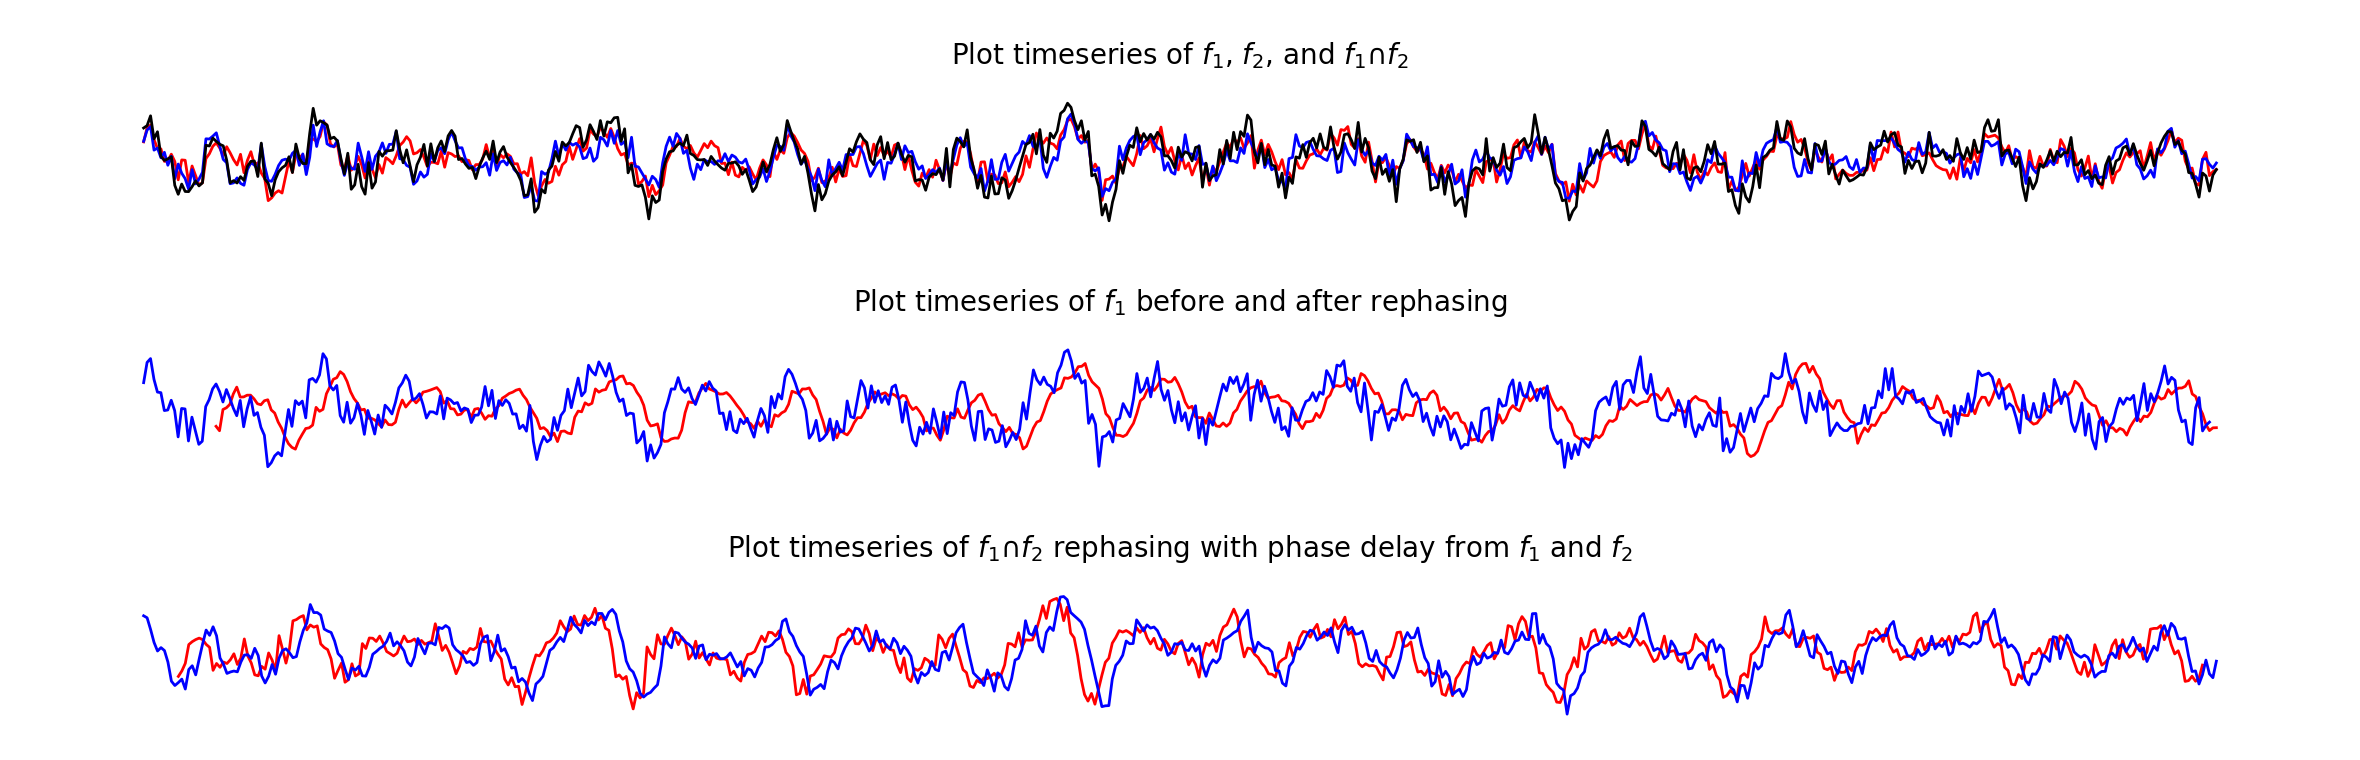

In [3]:
FONTSIZE = 5

pure_f = False

fig, axs = plt.subplots(nrows=3, figsize=(6,2), dpi=400)

ax = axs[0]
ax.set_title("Plot timeseries of $f_1$, $f_2$, and $f_1$\u2229$f_2$", fontsize=FONTSIZE)
for ix, (f_c, f_type) in enumerate(zip(["r", "b", "k"],["f1", "f2", "f1f2"])):
    tps, mean_bold = pkl_handler.extract_bootstrapped_mean_from_data(bootstrap_id, f_type, rephase=False, pure_f=pure_f)
    ax.plot(tps, mean_bold, c=f_c, lw=.5)

ax = axs[1]
ax.set_title("Plot timeseries of $f_1$ before and after rephasing", fontsize=FONTSIZE)
for ix, (f_c, f_type, rephase) in enumerate(zip(["r", "b"],["f1", "f1"],[True, False])):
    tps, mean_bold = pkl_handler.extract_bootstrapped_mean_from_data(bootstrap_id, f_type, rephase=rephase,pure_f=pure_f)
    ax.plot(tps, mean_bold, c=f_c, lw=.5)

ax = axs[2]
ax.set_title("Plot timeseries of $f_1$\u2229$f_2$ rephasing with phase delay from $f_1$ and $f_2$", fontsize=FONTSIZE)
for ix, (f_c, f_type, rephase, rephase_with) in enumerate(zip(["r","b"],["f1f2","f1f2"],[True,True],["f1","f2"])):
    tps, mean_bold = pkl_handler.extract_bootstrapped_mean_from_data(bootstrap_id, f_type, rephase=rephase, rephase_with=rephase_with, pure_f=pure_f)
    ax.plot(tps, mean_bold, c=f_c, lw=.5)

for ax in axs:
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()

True f1
True f2
True f1f2 f1
True f1f2 f2
False f1
False f2
False f1f2


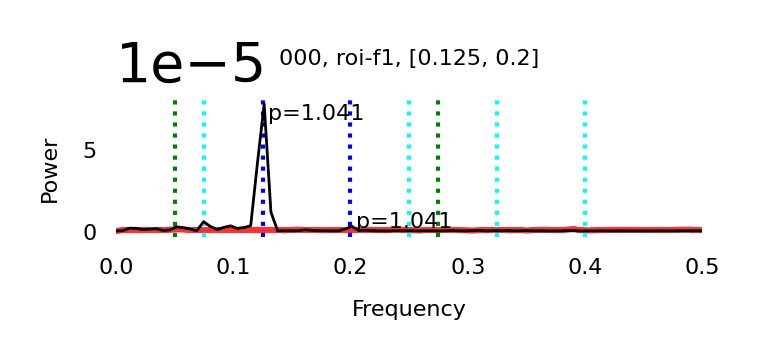

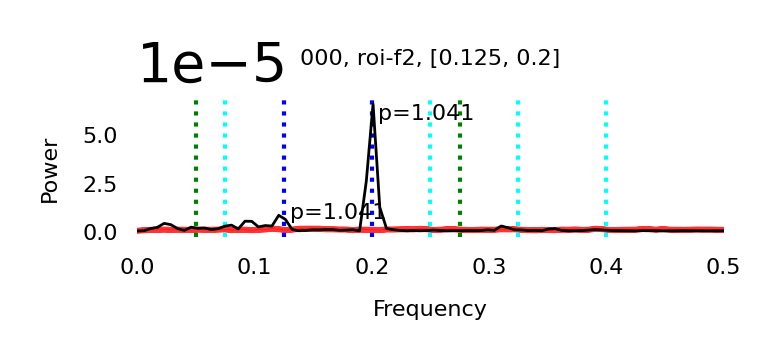

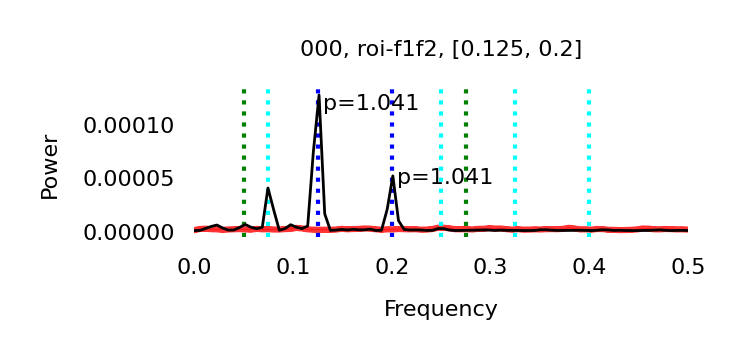

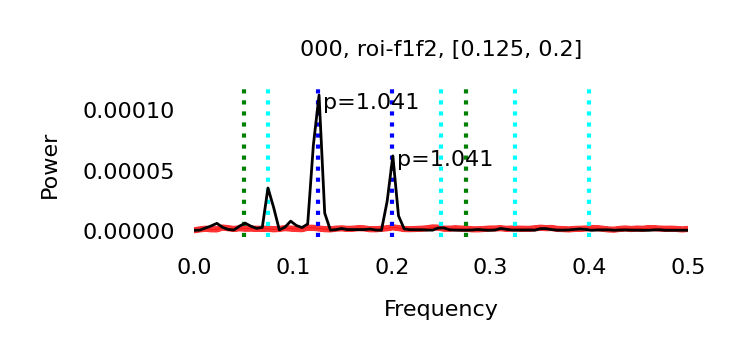

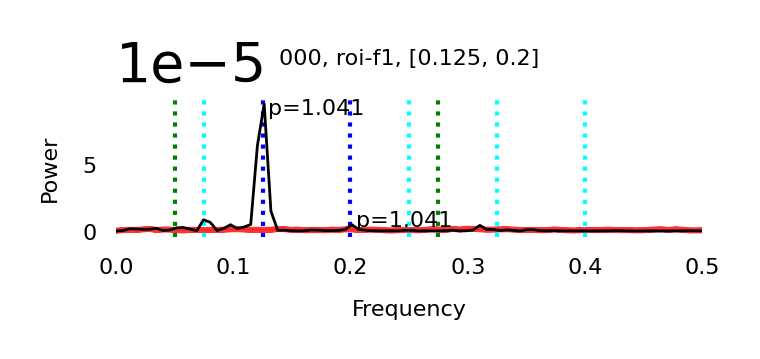

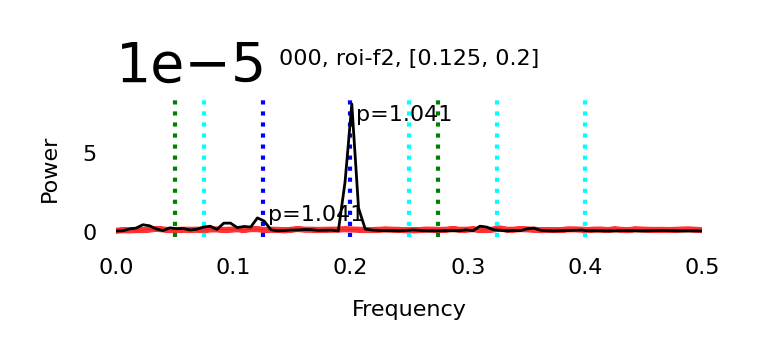

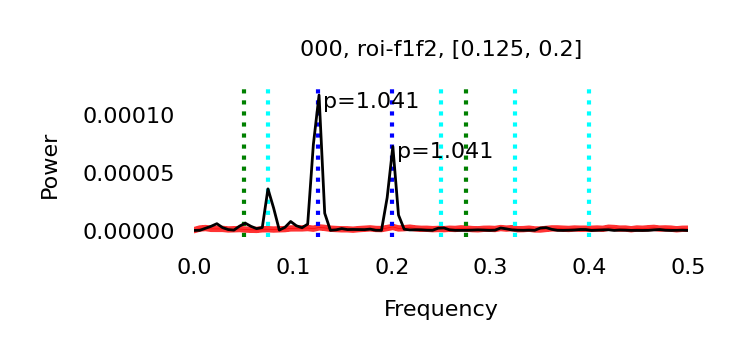

In [4]:
from collections import defaultdict
import numpy as np

pure_f = False

TR = .3
n_permutations = 10
frequencies = [.125,.2]
test_frequencies = [.125, .2, .075]

rephase = False # Consider rephasing of data

nperseg = 580
fig_dir = Path(set_base_dir(f"./ComputeCanada/frequency_tagging/figures/dual_frequency_roi_psd"))
frequency_grid = None
# Loop over datasets
# Loop over subjects
# Loop over ROIs (task)
# Loop over frequency of ROIs (f1, f2, f1&f2)

pkl_handler = f1_f2_data(datadir, n_bootstraps, sub_id, roi_task_id, f1, f2, task_id, experiment_id=experiment_id, mri_id=mri_id, fo=fo, pval=pval)

for rephase in [True,False]:
    for f_type in ["f1", "f2", "f1f2"]:
        if rephase and f_type == "f1f2":
            for rephase_with in ["f1", "f2"]:
                print(rephase, f_type, rephase_with)
                frequency_grid, observed_statistics, observed_power_spectrum, null_power_spectrums, p_values, bootstrapped_statistics = analyze_rois(
                    pkl_handler, 
                    f_type, 
                    test_frequencies, 
                    n_bootstraps, 
                    TR, 
                    n_permutations=n_permutations, 
                    nperseg=nperseg, 
                    rephase=rephase, 
                    rephase_with=rephase_with,
                    frequency_grid=frequency_grid,
                    pure_f=pure_f
                )
                plot_power_spectrum(frequency_grid, observed_power_spectrum, null_power_spectrums, n_permutations, frequencies, p_values, observed_statistics, add_im=True, sub_id=sub_id, roi_frequency=f_type, close_figure=False, png_out=None)
        else:
            print(rephase, f_type)
            frequency_grid, observed_statistics, observed_power_spectrum, null_power_spectrums, p_values, bootstrapped_statistics = analyze_rois(
                pkl_handler, 
                f_type, 
                test_frequencies, 
                n_bootstraps, 
                TR, 
                n_permutations=n_permutations, 
                nperseg=nperseg, 
                rephase=rephase, 
                frequency_grid=frequency_grid,
                pure_f=pure_f
            )
            plot_power_spectrum(frequency_grid, observed_power_spectrum, null_power_spectrums, n_permutations, frequencies, p_values, observed_statistics, add_im=True, sub_id=sub_id, roi_frequency=f_type, close_figure=False, png_out=None)
        #png_out = fig_dir / f"experiment-{experiment_id}_mri-{mri_id}_sub-{sub_id}_roitask-{task_id}-{figlabel}_task-{task_id_2}_pval-{pval}_fo-{fo}.png"